In [1]:
#!/opt/local/Library/Frameworks/Python.framework/Versions/3.5/bin/python3




# Kalman filter example demo in Python




# A Python implementation of the example given in pages 11-15 of "An

# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,

# University of North Carolina at Chapel Hill, Department of Computer

# Science, TR 95-041,

# https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf




# by Andrew D. Straw




import numpy as np

import matplotlib.pyplot as plt

import csv

import pandas as pd





# Read the dataframe


df=pd.read_csv("470_8.csv", header=None, dtype=np.float64)



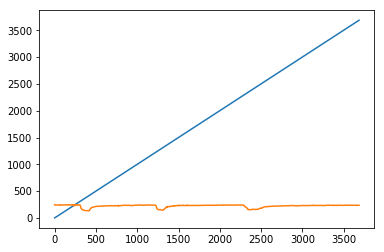

In [2]:
######################################################################

# Original just used random data

# z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)


# Here use data from file

# pull out the second column, convert to numpy array


z = df[1].values

 


plt.figure()

plt.plot(df)

plt.show()




plt.rcParams['figure.figsize'] = (10, 9)

In [3]:
# intial parameters


n_iter = len(z)

sz = (n_iter,) # size of array


x = 230# truth value (typo in example at top of p. 13 calls this z)







Q = 1e-5 # process variance

In [4]:
# allocate space for arrays

xhat=np.zeros(sz) # a posteri estimate of x

P=np.zeros(sz) # a posteri error estimate

xhatminus=np.zeros(sz) # a priori estimate of x

Pminus=np.zeros(sz) # a priori error estimate

K=np.zeros(sz) # gain or blending factor

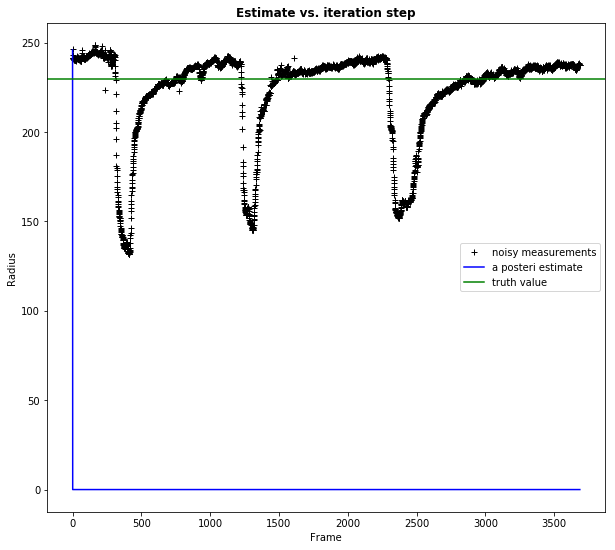

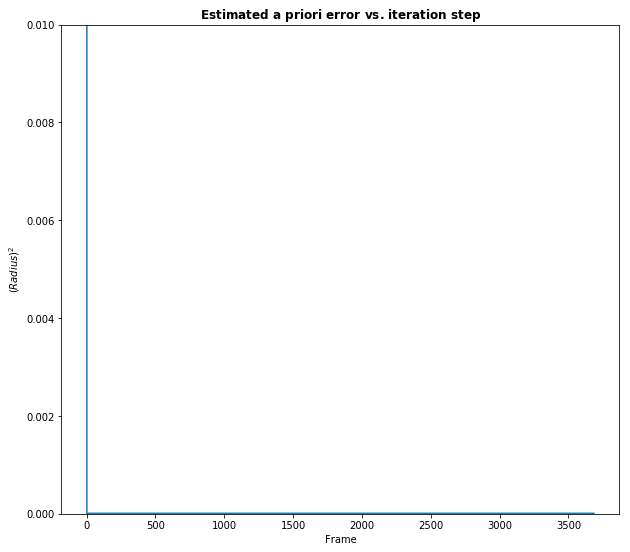

In [5]:
R = 15**2 # estimate of measurement variance, change to see effect




# intial guesses


xhat[0] = 246.0


P[0] = 5.0




for k in range(1,n_iter):

# time update

    xhatminus[k] = xhat[k-1]

    Pminus[k] = P[k-1]+Q




# measurement update

K[k] = Pminus[k]/( Pminus[k]+R )

xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])

P[k] = (1-K[k])*Pminus[k]




plt.figure()

plt.plot(z,'k+',label='noisy measurements')

plt.plot(xhat,'b-',label='a posteri estimate')

plt.axhline(x,color='g',label='truth value')

plt.legend()

plt.title('Estimate vs. iteration step', fontweight='bold')


plt.xlabel('Frame')

plt.ylabel('Radius')




plt.figure()

valid_iter = range(1,n_iter) # Pminus not valid at step 0

plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')

plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')


plt.xlabel('Frame')

plt.ylabel('$(Radius)^2$')


plt.setp(plt.gca(),'ylim',[0,.01])

plt.show()


standard deviation fixed-lag: 725.961
standard deviation kalman: 726.040
232.18814833799487


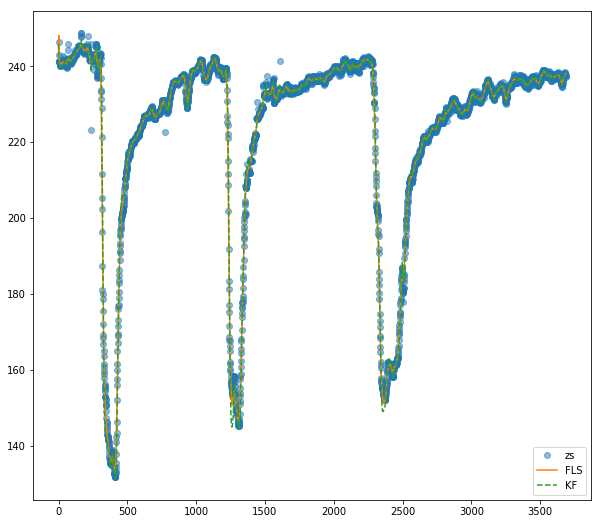

In [22]:
from filterpy.kalman import FixedLagSmoother, KalmanFilter
import numpy.random as random

fls = FixedLagSmoother(dim_x=2, dim_z=1, N=8)

fls.x = np.array([0., .5])
fls.F = np.array([[1.,1.],
                  [0.,1.]])

fls.H = np.array([[1.,0.]])
fls.P *= 200
fls.R *= 5.
fls.Q *= 0.001

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P *= 200
kf.R *= 1
kf.Q *= 0.0002

N = 4 # size of lag

nom =  np.array([t/2. for t in range (0, 3687)])
#zs = np.array([t + random.randn()*5.1 for t in nom])
zs = df[1].values

for z in zs:
    fls.smooth(z)
    
kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]


fls_res = abs(x_smooth - nom)
kf_res = abs(kf_x[:, 0] - nom)

plt.plot(zs,'o', alpha=0.5, marker='o', label='zs')
plt.plot(x_smooth, label='FLS')
plt.plot(kf_x[:, 0], label='KF', ls='--')
plt.legend(loc=4)

print('standard deviation fixed-lag: {:.3f}'.format(np.mean(fls_res)))
print('standard deviation kalman: {:.3f}'.format(np.mean(kf_res)))
print(x_smooth[3000])#input frame value to print smoothed x val at that point